# Урок 7. 

1. К алгоритму kNN, реализованному на уроке, реализуйте добавление весов соседей по любому из показанных на уроке принципов.<br>
2. Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.

### 1.

In [58]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [60]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

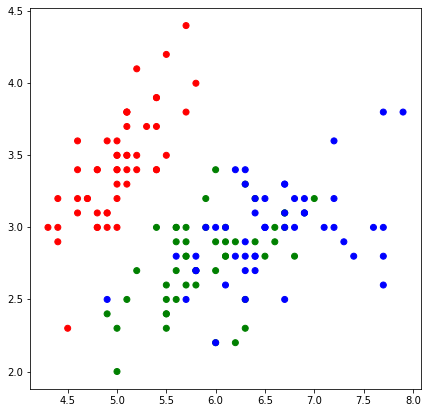

In [62]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [63]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [64]:
{class_item: 0 for class_item in set(y_train)}

{0: 0, 1: 0, 2: 0}

### Изменим строчку подсчета частоты появления разных классов на присвоение классу весового значения (строчка №26)

In [70]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
            
    
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            
            classes[d[1]] += 1 / (d[0] + 1)
            #classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
       
    return answers

Напишем функцию для вычисления точности

In [71]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [72]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.733


Построим график распределения классов.

In [73]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

(2352, 2)


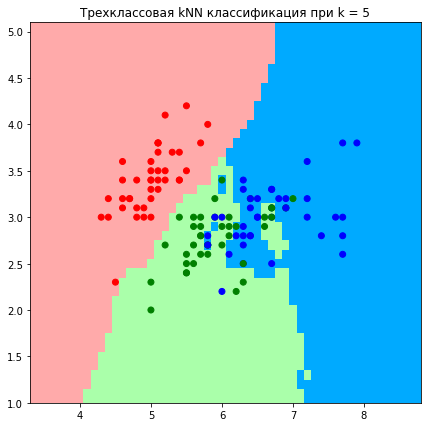

In [74]:

get_graph(X_train, y_train, k)

In [17]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.733


(2352, 2)


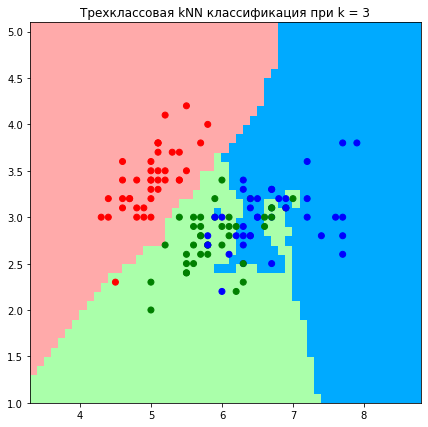

CPU times: user 15.2 s, sys: 87.9 ms, total: 15.3 s
Wall time: 15.7 s


In [18]:
%%time
get_graph(X_train, y_train, k)

In [19]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.733


(2352, 2)


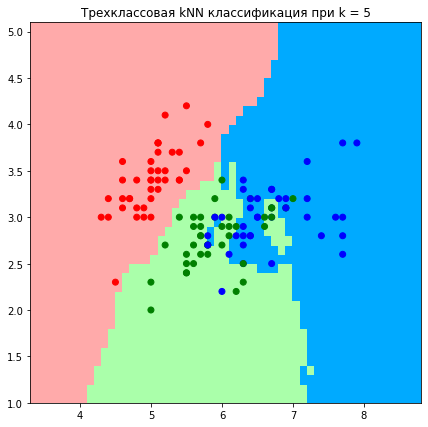

CPU times: user 14.2 s, sys: 143 ms, total: 14.3 s
Wall time: 15.2 s


In [20]:
%%time
get_graph(X_train, y_train, k)

In [21]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.767


(2352, 2)


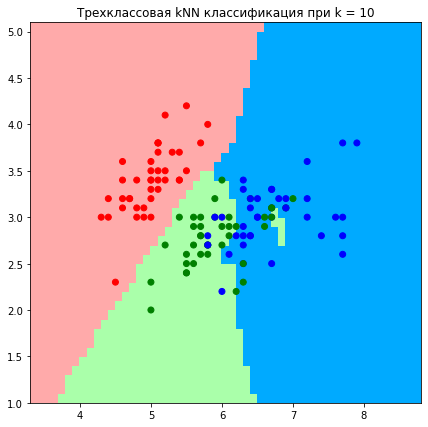

CPU times: user 13.9 s, sys: 75.5 ms, total: 14 s
Wall time: 14.5 s


In [22]:
%%time
get_graph(X_train, y_train, k)

При увеличении k мы на графиках наблюдаем, как алгоритм меньше концентрируется на выбросах, однако, точность на тестовой выборке при этом увеличивается.

### 2.

### Алгоритм K-means (K-средних)<a class='anchor' id='kmeans'>

Сделаем простую реализацию алгоритма K-means своими руками на Python.

Вначале сгенерируем три облака точек с помощью инструментов `sklearn`.

In [79]:
from sklearn.datasets import make_blobs, make_moons

X, y = make_blobs(n_samples=100, random_state=1)
# X, y = make_moons(n_samples=50, noise=0.02, random_state=1)

Изобразим точки на графике.

In [80]:
import matplotlib.pyplot as plt

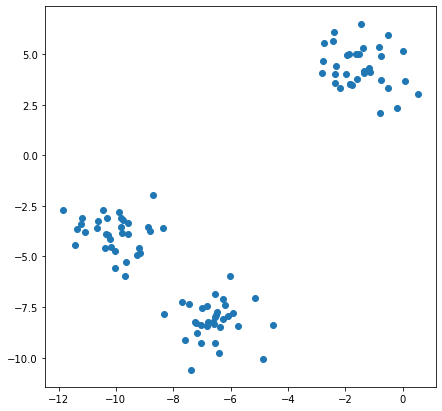

In [81]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [82]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [83]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

Напишем функцию для визуализации кластеров

In [84]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y', 'gray', 'olive', 'navy', 'aqua', 'teal']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

#### Напишем код по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построим график её зависимости от k (от 1 до 10) для выборки данных из этого урока.
#### При этом, вначале считаем средрее квадратичное внутрикластерное расстояние для каждого кластера, а затем, так как кластеров у нас от 1 до 10, усредним это значение по всем кластерам.

In [85]:
def new_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return distance

1 6.151251744722843
2 2.037142385154967
3 1.1704436643186562
4 0.9598742789849112
5 0.834449843781122
6 0.8345611055431545
7 0.7776642191930131
8 0.7406894769162233
9 0.7335752922386163
10 0.7132968037999683


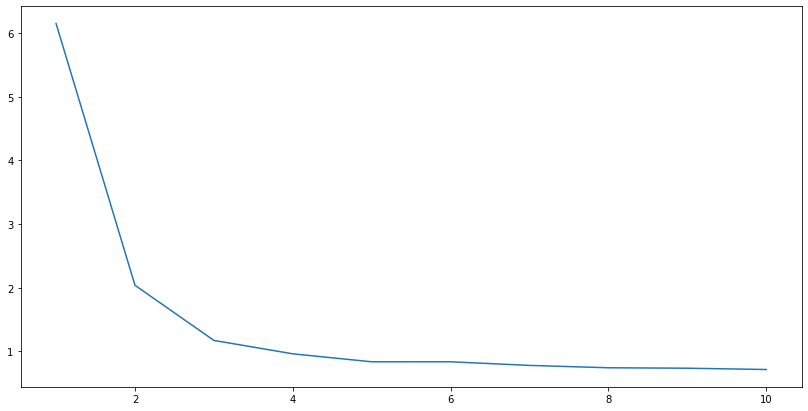

In [87]:
max_iterations = 10
min_distance = 1e-4
plt.figure(figsize=(14,7))
k_array = []
sum_s_array = []
for k in range(1, 11):
    s = []
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    for i in range(k):
        dist = [e_metrics(centroids[i], cluster) for cluster in clusters[i]]
        s.append(np.sum(dist)/len(clusters[i]))
    sum_s = np.sum(s)/k    
    print(k, sum_s)
    k_array.append(k)
    sum_s_array.append(sum_s)

plt.plot(k_array, sum_s_array)
plt.show()

Видно, что при кол-ве кластеров = 3 имеется более заметный изгиб и далее при увеличении количества кластеров функционал падает незначительно. Т.о. можно сделать вывод, что для данной выборки оптимальное значение кластеров = 3